<a href="https://colab.research.google.com/github/sofiyaibrayeva/64061_sofiyaibrayeva/blob/main/AML_assignment_1final_sofiya_ibrayeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *   Assignment 1_AML - Neural Network
# *   Date: 09/23/23
# *   Name: Sofiya Ibrayeva

---


# Purpose of the assignment:
The purpose of this assignment is to explore and extend your first Neural Network model.
This assignment aligns with the following module outcomes:
• MLO 1: Implement Keras and Tensorflow in a deep learning example by modifying an
existing neural network model to improve performance.
• MLO 2: Explain how different approaches affect the performance of the model.

---






Importing the IMDB movie review sentiment classification dataset from TensorFlow Keras. The code then loads the dataset into the variables (train_data, train_labels) and (test_data, test_labels), using the load_data() function. The num_words parameter specifies that only the top 10000 most frequent words in the dataset will be kept.

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding the first training data sequence in the IMDB movie review sentiment classification dataset.

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


Vectorizing the dataset by creating an all-zero matrix of shape (len(sequences), dimension)

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

vectorizing the training and test data from the IMDB movie review sentiment classification dataset, and converts the labels to floating-point numbers.

## x_train and x_test are numpy arrays of vectorized training and test sequences.
##y_train and y_test are numpy arrays of training and test labels, converted to floating-point numbers.


In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Importing the necessary modules from TensorFlow's Keras API and creating a Sequential model

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the neural network model with specified configurations

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Splitting the training data into training and validation sets by extracting the first 10,000 samples for validation data and leaving the remaining samples for training data

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


Training the neural network model and capture the training history with batch size 512 and 20 epochs. Extracting keys from the training history dictionary

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5110 - accuracy: 0.7805 - val_loss: 0.3944 - val_accuracy: 0.8520
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3144 - accuracy: 0.8966 - val_loss: 0.3088 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2359 - accuracy: 0.9221 - val_loss: 0.2937 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1920 - accuracy: 0.9361 - val_loss: 0.2734 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1560 - accuracy: 0.9497 - val_loss: 0.2902 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1371 - accuracy: 0.9548 - val_loss: 0.2866 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1172 - accuracy: 0.9636 - val_loss: 0.3065 - val_accuracy: 0.8812
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Ploting the training loss as red dots ("ro") and the validation loss as a solid red line

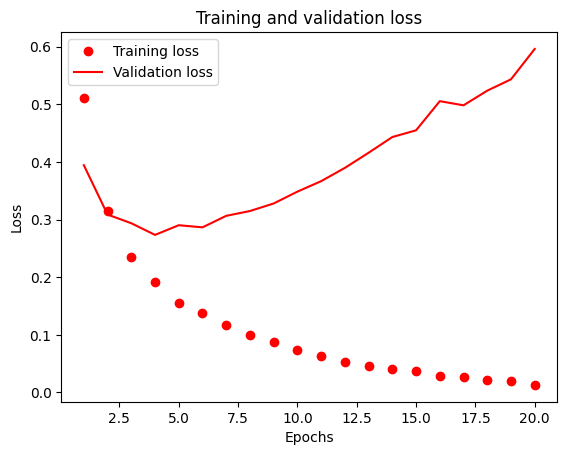

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Ploting the training accuracy as red dots ("ro") and the validation accuracy as a solid red line

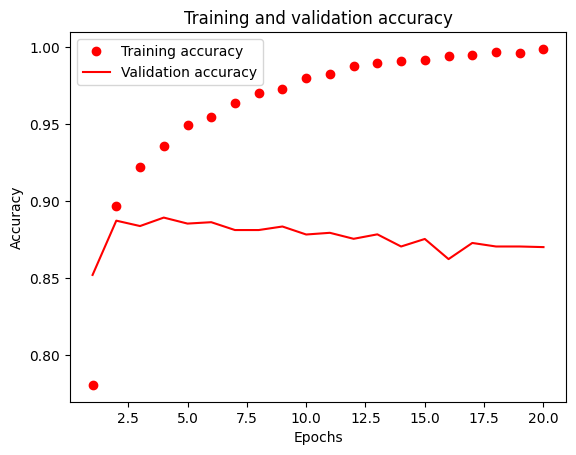

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training the Model 1 Using epoches 4

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4763 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2849 - accuracy: 0.8989
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2194 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2978 - accuracy: 0.8788


In [13]:
results

[0.29782456159591675, 0.8788400292396545]

Making predictions on a set of test data using a trained neural network model

In [14]:
model.predict(x_test)


782/782 [==============================] - 1s 2ms/step


array([[0.19424409],
       [0.9988653 ],
       [0.69332325],
       ...,
       [0.07112815],
       [0.06246876],
       [0.4343789 ]], dtype=float32)

Training the model 2 using epoches 5 by creating a Sequential neural network model and compiling the model with specified configurations

In [15]:
# Install Keras
!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 9ms/step - loss: 0.5298 - accuracy: 0.7620
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 0.3140 - accuracy: 0.8994
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2319 - accuracy: 0.9217
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.1918 - accuracy: 0.9343
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2988 - accuracy: 0.8846


In [16]:
results

[0.29881879687309265, 0.8846399784088135]

# Experimenting with a neural network architecture with three hidden layers.
### Model 1.1: Trained with 3 hidden layers

Defining a sequential model with 3 hidden layers, each with 16 neurons and ReLU activation, followed by an output layer for binary classification.

In [17]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5447 - accuracy: 0.7613 - val_loss: 0.4088 - val_accuracy: 0.8560
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3316 - accuracy: 0.8875 - val_loss: 0.3120 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2412 - accuracy: 0.9157 - val_loss: 0.2825 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1887 - accuracy: 0.9341 - val_loss: 0.2805 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1531 - accuracy: 0.9485 - val_loss: 0.2816 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1294 - accuracy: 0.9549 - val_loss: 0.2952 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1125 - accuracy: 0.9634 - val_loss: 0.3152 - val_accuracy: 0.8816
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Ploting the graph between the training loss as red dots ("ro") and the validation loss as a solid red line

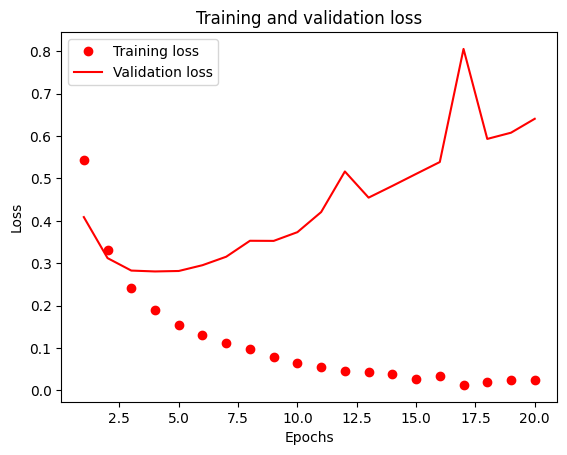

In [18]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Ploting the graph between the training accuracy as red dots ("ro") and the validation accuracy as a solid red line

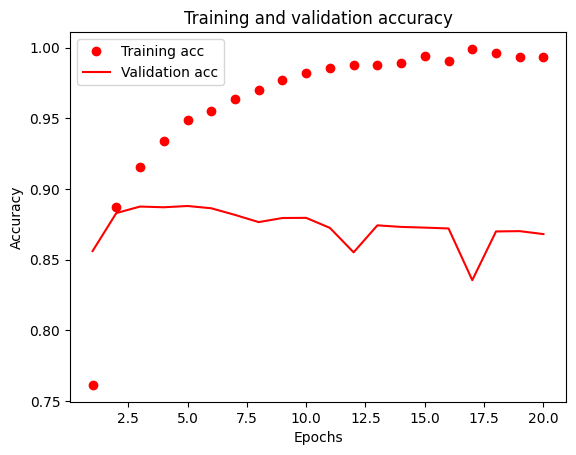

In [19]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 11ms/step - loss: 0.2125 - accuracy: 0.9469
Epoch 2/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1343 - accuracy: 0.9588
Epoch 3/12
49/49 [==============================] - 1s 10ms/step - loss: 0.1065 - accuracy: 0.9667
Epoch 4/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0861 - accuracy: 0.9733
Epoch 5/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0687 - accuracy: 0.9794
Epoch 6/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0550 - accuracy: 0.9836
Epoch 7/12
49/49 [==============================] - 1s 10ms/step - loss: 0.0458 - accuracy: 0.9864
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0330 - accuracy: 0.9910
Epoch 9/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0260 - accuracy: 0.9939
Epoch 10/12
49/49 [==============================] - 1s 10ms/step - loss: 0.0206 - accuracy: 0.9946
Epoch 11/

[0.29782456159591675, 0.8788400292396545]

#Exploring a simplified neural network architecture with one hidden layer.
## Model 1.2: Trained with 1 hidden layer

In [21]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5213 - accuracy: 0.7862 - val_loss: 0.4175 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3469 - accuracy: 0.8908 - val_loss: 0.3444 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2767 - accuracy: 0.9112 - val_loss: 0.3164 - val_accuracy: 0.8751
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2325 - accuracy: 0.9250 - val_loss: 0.3000 - val_accuracy: 0.8783
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2033 - accuracy: 0.9351 - val_loss: 0.2790 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1799 - accuracy: 0.9435 - val_loss: 0.2964 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1626 - accuracy: 0.9496 - val_loss: 0.2780 - val_accuracy: 0.8864
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

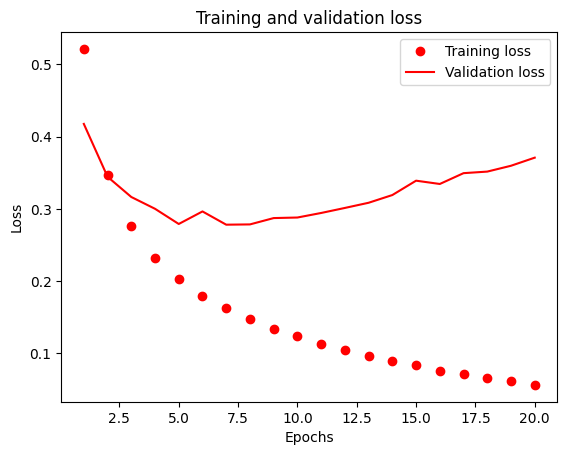

In [22]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

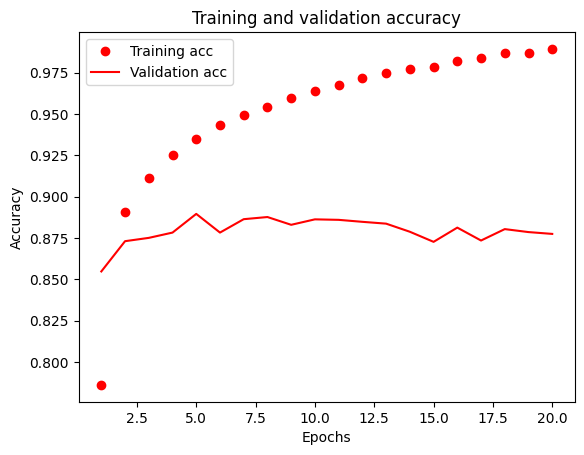

In [23]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
model_12.fit(x_train, y_train, epochs=12, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

Epoch 1/12
49/49 [==============================] - 0s 9ms/step - loss: 0.1784 - accuracy: 0.9450
Epoch 2/12
49/49 [==============================] - 1s 10ms/step - loss: 0.1462 - accuracy: 0.9531
Epoch 3/12
49/49 [==============================] - 0s 10ms/step - loss: 0.1281 - accuracy: 0.9597
Epoch 4/12
49/49 [==============================] - 1s 10ms/step - loss: 0.1155 - accuracy: 0.9639
Epoch 5/12
49/49 [==============================] - 0s 10ms/step - loss: 0.1062 - accuracy: 0.9664
Epoch 6/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0967 - accuracy: 0.9693
Epoch 7/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0893 - accuracy: 0.9728
Epoch 8/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0829 - accuracy: 0.9764
Epoch 9/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0773 - accuracy: 0.9779
Epoch 10/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9793
Epoch 11/12
4

[0.29782456159591675, 0.8788400292396545]

# Experimenting with different hidden unit sizes in the neural network layers.
## Model 2.1: Training with 32 hidden units

Defining a sequential model with 32 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [25]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5134 - accuracy: 0.7641 - val_loss: 0.4086 - val_accuracy: 0.8273
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2992 - accuracy: 0.8940 - val_loss: 0.2926 - val_accuracy: 0.8869
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2293 - accuracy: 0.9167 - val_loss: 0.2757 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1822 - accuracy: 0.9354 - val_loss: 0.2805 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1503 - accuracy: 0.9490 - val_loss: 0.2967 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1226 - accuracy: 0.9598 - val_loss: 0.3264 - val_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1123 - accuracy: 0.9614 - val_loss: 0.3120 - val_accuracy: 0.8841
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

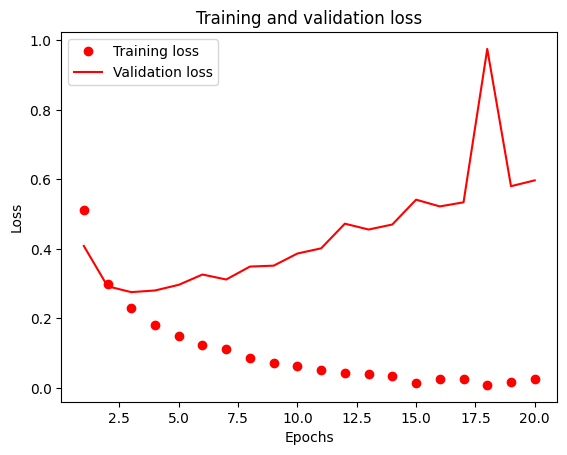

In [26]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

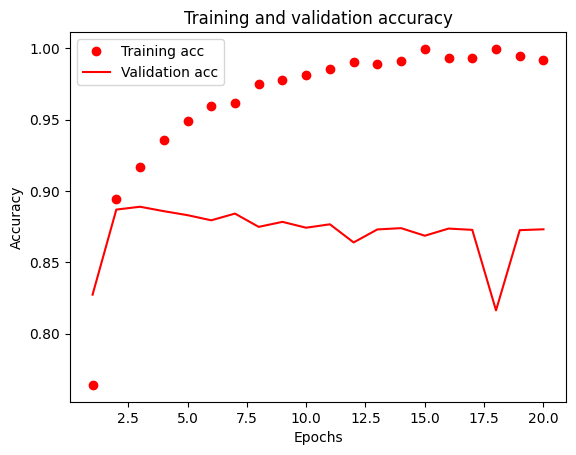

In [27]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1945 - accuracy: 0.9470
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1182 - accuracy: 0.9628
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0867 - accuracy: 0.9737
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0625 - accuracy: 0.9821
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0427 - accuracy: 0.9894
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0317 - accuracy: 0.9929
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0211 - accuracy: 0.9952
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5809 - accuracy: 0.8638


[0.5808917880058289, 0.8637999892234802]

# Exploring the impact of increased hidden unit size in neural network layers.
## Model 2.2: Training with 64 hidden units

Defining a sequential model with 64 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [29]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5059 - accuracy: 0.7535 - val_loss: 0.4526 - val_accuracy: 0.7911
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2940 - accuracy: 0.8902 - val_loss: 0.2878 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2205 - accuracy: 0.9185 - val_loss: 0.3358 - val_accuracy: 0.8616
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1768 - accuracy: 0.9350 - val_loss: 0.2933 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1531 - accuracy: 0.9445 - val_loss: 0.2893 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1135 - accuracy: 0.9619 - val_loss: 0.4258 - val_accuracy: 0.8496
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0977 - accuracy: 0.9667 - val_loss: 0.3379 - val_accuracy: 0.8766
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

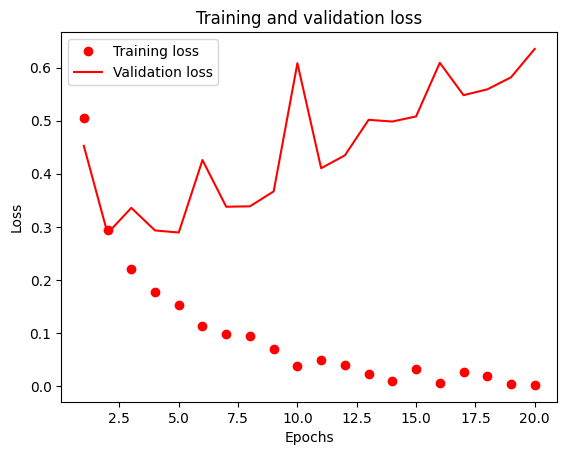

In [30]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

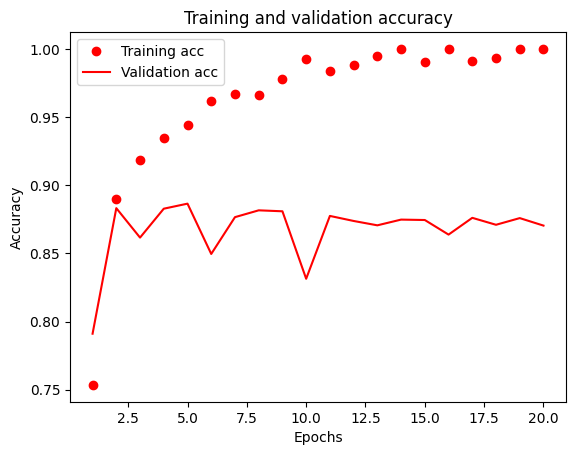

In [31]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 1s 16ms/step - loss: 0.1852 - accuracy: 0.9467
Epoch 2/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0943 - accuracy: 0.9708
Epoch 3/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0583 - accuracy: 0.9834
Epoch 4/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0319 - accuracy: 0.9924
Epoch 5/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0224 - accuracy: 0.9941
Epoch 6/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0186 - accuracy: 0.9943
Epoch 7/8
49/49 [==============================] - 1s 16ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.6176 - accuracy: 0.8689


[0.6175852417945862, 0.8688799738883972]

# Exploring the effect of using even larger hidden units in neural network layers.
## Model 2.3: Training with 128 hidden units

Defining a sequential model with 128 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [33]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5306 - accuracy: 0.7419 - val_loss: 0.3640 - val_accuracy: 0.8514
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3144 - accuracy: 0.8745 - val_loss: 0.2810 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2298 - accuracy: 0.9120 - val_loss: 0.2723 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1765 - accuracy: 0.9329 - val_loss: 0.2829 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1434 - accuracy: 0.9477 - val_loss: 0.3333 - val_accuracy: 0.8690
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1147 - accuracy: 0.9568 - val_loss: 0.3325 - val_accuracy: 0.8744
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0913 - accuracy: 0.9717 - val_loss: 0.3390 - val_accuracy: 0.8817
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

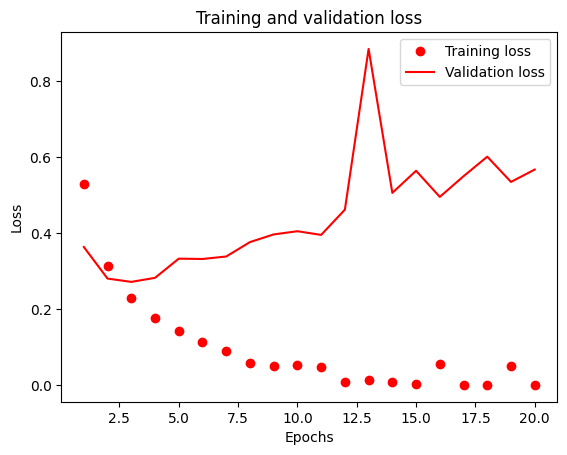

In [34]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

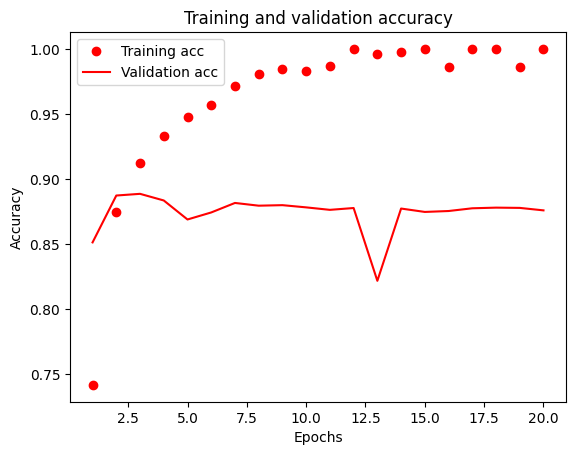

In [35]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 1s 23ms/step - loss: 0.1655 - accuracy: 0.9468
Epoch 2/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0841 - accuracy: 0.9743
Epoch 3/8
49/49 [==============================] - 1s 25ms/step - loss: 0.0435 - accuracy: 0.9874
Epoch 4/8
49/49 [==============================] - 1s 24ms/step - loss: 0.0261 - accuracy: 0.9916
Epoch 5/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 6/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0172 - accuracy: 0.9949
Epoch 7/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5056 - accuracy: 0.8707


[0.5056270360946655, 0.8707200288772583]

# Experimenting with an alternative loss function - Mean Squared Error (MSE).
## Model 3: Training with MSE loss

Defining a sequential model with two hidden layers (16 neurons each, ReLU activation), followed by an output layer for binary classification (sigmoid activation).

In [37]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1900 - accuracy: 0.7579 - val_loss: 0.1403 - val_accuracy: 0.8413
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1129 - accuracy: 0.8801 - val_loss: 0.1040 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0828 - accuracy: 0.9115 - val_loss: 0.0957 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0664 - accuracy: 0.9255 - val_loss: 0.0868 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0572 - accuracy: 0.9375 - val_loss: 0.0850 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0489 - accuracy: 0.9478 - val_loss: 0.0833 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0429 - accuracy: 0.9556 - val_loss: 0.0945 - val_accuracy: 0.8703
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

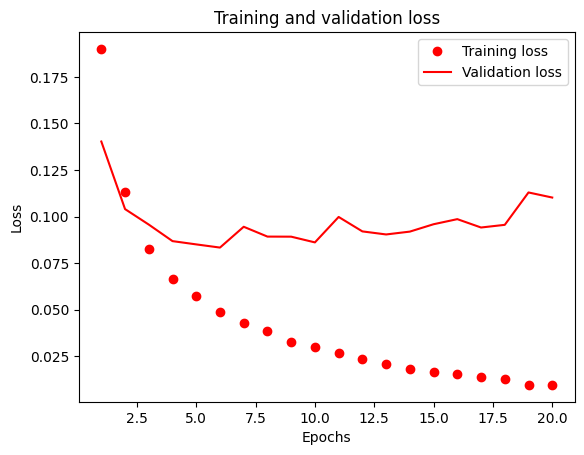

In [38]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

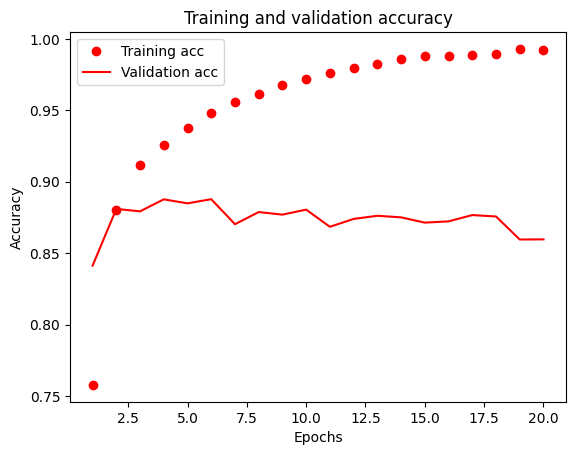

In [39]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0448 - accuracy: 0.9460
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0360 - accuracy: 0.9588
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0296 - accuracy: 0.9678
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0269 - accuracy: 0.9716
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9756
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9780
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.9815
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.8668


[0.10764683783054352, 0.8668000102043152]

# Exploring the use of the Tanh activation function, a historically popular choice.
## Model 4: Training with Tanh Activation

Defining a sequential model with two hidden layers (16 neurons each) using the Tanh activation function, followed by an output layer for binary classification (sigmoid activation).

In [41]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5035 - accuracy: 0.7963 - val_loss: 0.3815 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3062 - accuracy: 0.8995 - val_loss: 0.2993 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2264 - accuracy: 0.9229 - val_loss: 0.2900 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1739 - accuracy: 0.9418 - val_loss: 0.2763 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1439 - accuracy: 0.9519 - val_loss: 0.3007 - val_accuracy: 0.8782
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1214 - accuracy: 0.9603 - val_loss: 0.3078 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0930 - accuracy: 0.9725 - val_loss: 0.3421 - val_accuracy: 0.8786
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

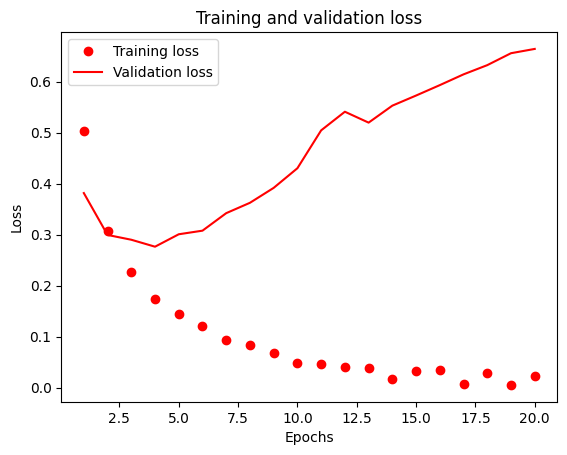

In [42]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

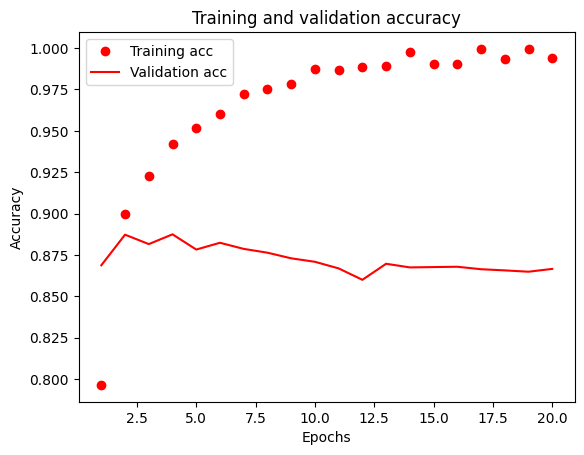

In [43]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2398 - accuracy: 0.9447
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1414 - accuracy: 0.9583
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1182 - accuracy: 0.9628
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0995 - accuracy: 0.9689
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0840 - accuracy: 0.9728
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0753 - accuracy: 0.9766
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0704 - accuracy: 0.9777
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.6315 - accuracy: 0.8455


[0.6314722299575806, 0.8454800248146057]

# Implementing regularization techniques to enhance model performance on validation data.
## Model 5.1: L2 Regularization (Weight Decay)

Defining a sequential model with two hidden layers (16 neurons each) using ReLU activation, and applying L2 regularization to the kernel (weight) matrices with a regularization strength of 0.001.

In [45]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5612 - accuracy: 0.7758 - val_loss: 0.4417 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3664 - accuracy: 0.8917 - val_loss: 0.3600 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2945 - accuracy: 0.9187 - val_loss: 0.3477 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2573 - accuracy: 0.9281 - val_loss: 0.3394 - val_accuracy: 0.8807
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2288 - accuracy: 0.9403 - val_loss: 0.3283 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2128 - accuracy: 0.9463 - val_loss: 0.3726 - val_accuracy: 0.8731
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2032 - accuracy: 0.9525 - val_loss: 0.3405 - val_accuracy: 0.8834
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

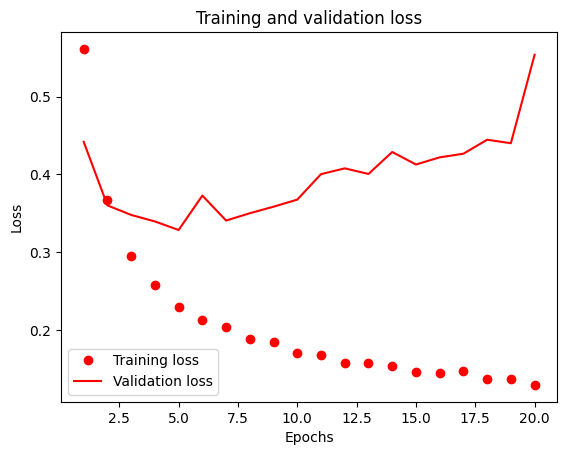

In [46]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

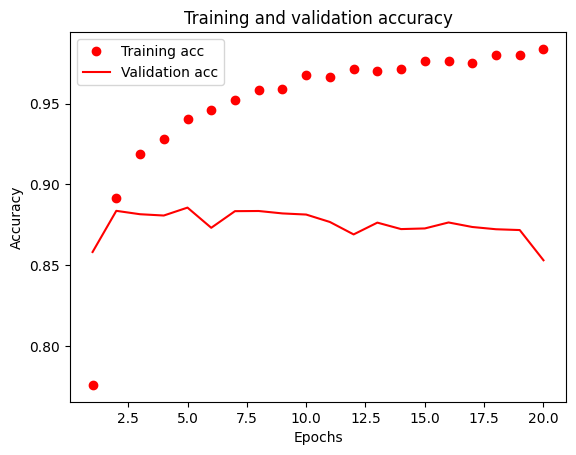

In [47]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2550 - accuracy: 0.9365
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2120 - accuracy: 0.9463
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1927 - accuracy: 0.9536
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1864 - accuracy: 0.9550
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1807 - accuracy: 0.9573
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1748 - accuracy: 0.9610
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1739 - accuracy: 0.9593
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.8697


[0.42711442708969116, 0.8696799874305725]

# Implementing dropout regularization to enhance model generalization and robustness.
## Model 5.2: Dropout Layers (Dropout Rate of 0.5)

Defining a sequential model with two hidden layers (16 neurons each) using ReLU activation, and inserting dropout layers with a dropout rate of 0.5 after each hidden layer.

In [49]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.6537 - accuracy: 0.5995 - val_loss: 0.5501 - val_accuracy: 0.8375
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5368 - accuracy: 0.7388 - val_loss: 0.4402 - val_accuracy: 0.8652
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4621 - accuracy: 0.7985 - val_loss: 0.3604 - val_accuracy: 0.8768
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4008 - accuracy: 0.8330 - val_loss: 0.3159 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3498 - accuracy: 0.8651 - val_loss: 0.2947 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3044 - accuracy: 0.8880 - val_loss: 0.2770 - val_accuracy: 0.8891
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2685 - accuracy: 0.9034 - val_loss: 0.2822 - val_accuracy: 0.8830
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

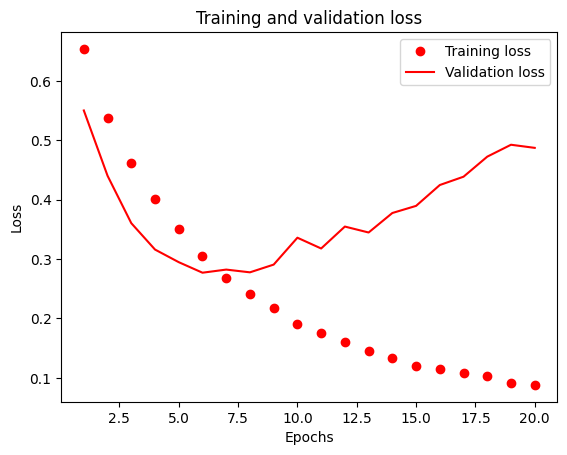

In [50]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


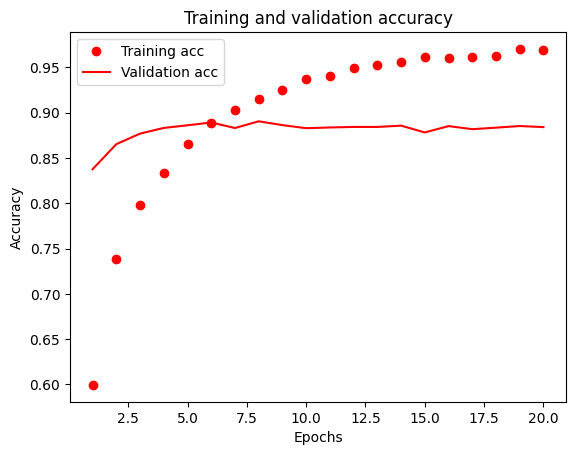

In [51]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout


Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2502 - accuracy: 0.9199
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2122 - accuracy: 0.9286
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1857 - accuracy: 0.9366
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1687 - accuracy: 0.9407
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1593 - accuracy: 0.9430
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.9440
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1444 - accuracy: 0.9461
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4764 - accuracy: 0.8739


[0.4763942062854767, 0.8739200234413147]

# Training the model with Hyper-tuned Parameters.
## Model Hyper: Tuned Architecture with Regularization and Dropout

Defining a sequential model with multiple hidden layers, incorporating regularization and dropout. Hyper-tuned parameters include hidden layer sizes, L2 regularization, and dropout rates.

In [53]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.2495 - accuracy: 0.5823 - val_loss: 0.1970 - val_accuracy: 0.8308
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1998 - accuracy: 0.7275 - val_loss: 0.1393 - val_accuracy: 0.8553
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1518 - accuracy: 0.8189 - val_loss: 0.1090 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1260 - accuracy: 0.8591 - val_loss: 0.1036 - val_accuracy: 0.8753
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1054 - accuracy: 0.8887 - val_loss: 0.0992 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0882 - accuracy: 0.9091 - val_loss: 0.1027 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0787 - accuracy: 0.9230 - val_loss: 0.1105 - val_accuracy: 0.8735
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

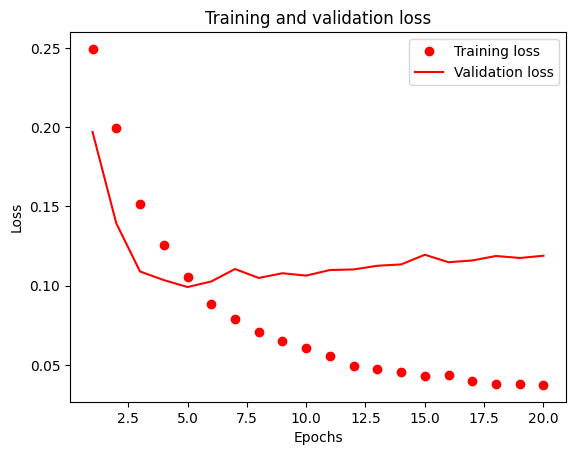

In [54]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

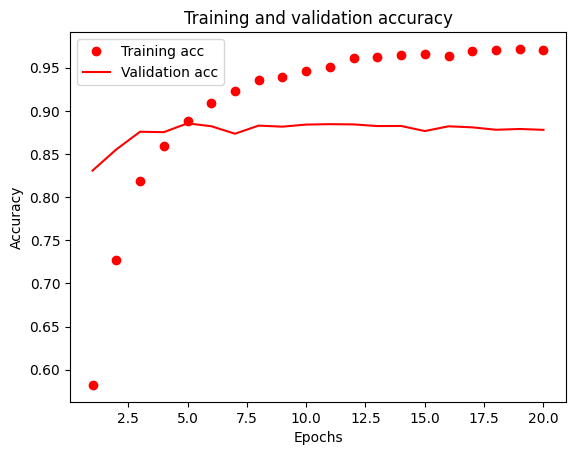

In [55]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [56]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper


Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0724 - accuracy: 0.9299
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0637 - accuracy: 0.9405
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0616 - accuracy: 0.9401
Epoch 4/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0562 - accuracy: 0.9481
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0540 - accuracy: 0.9499
Epoch 6/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0526 - accuracy: 0.9514
Epoch 7/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0506 - accuracy: 0.9537
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1161 - accuracy: 0.8780


[0.1160513162612915, 0.8779600262641907]

##Summarizing the performance metrics (loss and accuracy) for multiple models.

In [57]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_M23[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_M23[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_11','Model_12','Model_21','Model_22','Model_23','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hyper']
plt.clf()

<Figure size 640x480 with 0 Axes>

##Comparing the performance of multiple models by creating a scatter plot with loss values on the x-axis and accuracy values on the y-axis.


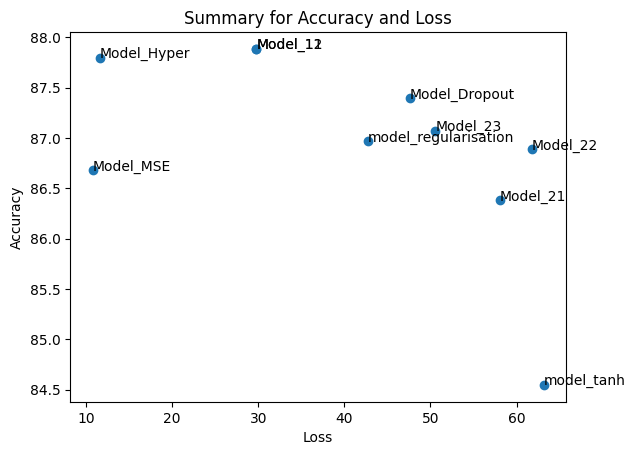

In [58]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

#SUMMARY
* Model_11 (3 layers): This model has three hidden layers.
* Model_12 (1 layer): This model has only one hidden layer.
* Model_21 (32 units): Hidden layers have 32 units each.
* Model_22 (64 units): Hidden layers have 64 units each.
* Model_23 (128 units): Hidden layers have 128 units each.
* Model_MSE (MSE loss): Utilizes Mean Squared Error (MSE) loss function.
* Model_tanh (tanh activation): Uses the tanh activation function.
* Model_Regularisation (L2 regularization): Applies L2 regularization with a coefficient of 0.0001 to all hidden layers.
* Model_Dropout (dropout): Implements dropout with a rate of 0.5 after each hidden layer.
* Model_Hyper (hyper-tuned): Combines various changes in one.

#Model Compilation:
The binary cross-entropy loss function is well-suited for classification models, quantifying the alignment of predicted probabilities (ranging from 0 to 1) with actual labels. In contrast, mean squared error (MSE) is typically used in regression tasks, measuring the closeness of a regression line to data points. Squaring differences ensures that negative and positive discrepancies are accounted for.

#Graphical Analysis:

* The "Model_Hyper" achieved the highest accuracy and the lowest loss among all models.
* MSE loss resulted in minimal loss when compared to other models (excluding the hyper-tuned model).
* Increasing the number of units from 16 to 32, 64, and 128 resulted in marginal accuracy improvements and steadily decreasing loss.
* Increasing the number of hidden layers from 1 to 3 had no significant impact on loss or accuracy.
* The tanh activation function led to lower accuracy due to vanishing gradient issues.
* Surprisingly, regularization increased loss and decreased accuracy, contrary to the expected outcome, as it is typically used to mitigate overfitting and improve generalization.
* Dropout regularization reduced loss but had a relatively minor impact on accuracy.

##These findings provide valuable insights into the performance and behavior of different model configurations and techniques, helping to guide future model selection and development based on the specific requirements of your task.






